# Função de Transferência de um Sensor de Posição

<font size=1>Fonte: Andrés Marrugo, PhD, Universidad Tecnológica de Bolívar.</font>

A **função de transferência** de um pequeno sensor de posição é avaliada experimentalmente.  
O sensor é feito a partir de um ímã pequeno instalado numa posição em relação à linha central (Figura 1) que é sentida pela força horizontal e restauradora do ímã. O ímã é mantido a uma distância fixa, <tt>h</tt>, da chapa de ferro. As medições realizadas no experimento são apresentadas na tabela seguinte.

Deslocamento, d (mm) | 0,0 | 0,08 | 0,16 | 0,24 | 0,32 | 0,4 | 0,48 | 0,52
----|----|----|----|----|----|----|----|----
Força, f (mN) | 0,0 | 0,576 | 1,147 | 1,677 | 2,187 | 2,648 | 3,089 | 3,295

<img src="img/sensor_posicao_simples.png" />

Figura 1 - Sensor de Posição

## Procedimentos
1. Encontre a função de transferência linear, $d=a+b.f$, onde $d$ é o deslocamento e $f$ é a força restauradora, que melhor se adapta a esses dados. 
2. Encontre uma função de transferência na forma de um polinômio de segunda ordem, $d = a + bf + cf^2$, onde $d$ é o deslocamento e $f$ é a força restauradora, avaliando as constantes $a$, $b$ e $c$. 
3. Plote os dados originais juntamente com as funções de transferência em (1) e (2) e discuta os erros na escolha da aproximação.

In [1]:
%pylab inline
#import pylab as plt
#import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Solução

Vamos começar plotando os dados:

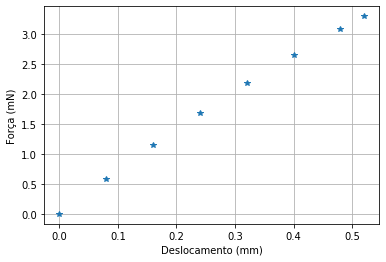

In [2]:
dist = array([0,0.08,0.16,0.24,0.32,0.4,0.48,0.52])          # converte uma lista em vetor
forca = array([0,0.576,1.147,1.677,2.187,2.648,3.089,3.295]) # converte uma lista em vetor

plot(dist,forca,'*');
ylabel(u'Força (mN)'); xlabel('Deslocamento (mm)');
grid('on'); #axis([-0.5,3.5,-0.1,0.6])
show();

Podemos ver que os dados são aproximadamente lineares. A função de transferência linear que melhor se ajusta aos dados é encontrada realizando um ajuste linear no sentido dos mínimos quadrados. Se voltarmos ao livro e revisarmos como realizar a aproximação linear das funções de transferência não-lineares.

In [3]:
from IPython.display import IFrame
IFrame('pdf/linear-approximation.pdf', width='100%', height='100%')
#IFrame('c:/Desktop/topicos_em_controle_I.pdf', width=500, height=500)

Vemos que precisamos ajustar os dados a uma linha de equação $d = a.f + b$, e precisamos calcular os coeficientes $a$ e $b$ que fornecem um melhor ajuste no sentido de mínimos quadrados. Para fazer isso em <b>python</b>, usamos a função <a href=http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html><b>polyfit</b></a>.

Os coeficientes calculados são: a = 0.15766105870626124 e b = -0.013105877153354043


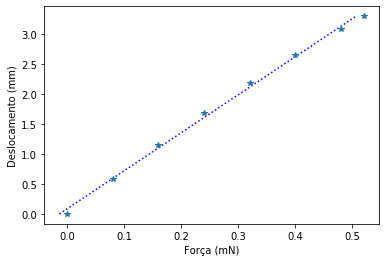

In [4]:
# polyfit calcula os coeficientes 'a' e 'b' da reta (polinômio de grau=1)
import numpy as np
a,b = np.polyfit(forca,dist,1)
print(u'Os coeficientes calculados são: a =',a,'e b =',b)

dist1 = a * forca + b
plt.plot(dist1,forca,':b',label='Linha Ajustada')
plt.plot(dist,forca,'*')
plt.ylabel('Deslocamento (mm)')
plt.xlabel(u'Força (mN)')
#plt.axis([0,0.6,0,3])
plt.show()

Nós obtivemos o ajuste da reta aos dados. Vários pontos não estão exatamente na reta, portanto, há sempre um erro com relação à função de transferência ideal. Provavelmente, uma aproximação de segunda ordem pode ser melhor. <p>Para a função de transferência do item (2), $d = a + b.f + c.f^2$, temos que encontrar $a$, $b$ e $c$.

In [6]:
# polyfit calcula os coeficientes 'a', 'b' e 'c' do polinômio de grau=2
c2,b2,a2 = np.polyfit(forca,dist,2)

print(u'Os coeficientes calculados são: a =',a2,'b =',b2,'c =',c2)

Os coeficientes calculados são: a = 0.001873680402210414 b = 0.12623326970287424 c = 0.00926531112283226


Agora vamos plotar as duas curvas...

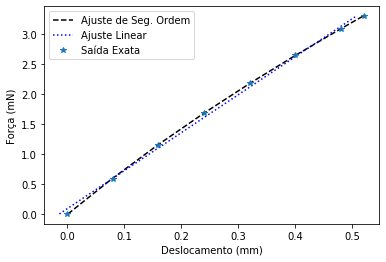

In [7]:
dist2 = a2 + b2 * forca + c2 * forca**2
tf2 = plt.plot(dist2,forca,'--k',label='Ajuste de Seg. Ordem')
tf1 = plt.plot(dist1,forca,':b',label='Ajuste Linear')
tf0 = plt.plot(dist,forca,'*',label=u'Saída Exata')
plt.xlabel('Deslocamento (mm)')
plt.ylabel(u'Força (mN)')
plt.legend(loc='upper left')
plt.show()

Agora vamos calcular os erros...

In [8]:
# Erro do ajuste linear
erro1 = np.sum(np.abs(dist - dist1))/len(dist)
erro1_max = np.max(np.abs(dist - dist1))
print('Erro médio do Ajuste Linear : ', erro1)
print('Erro máximo do Ajuste Linear: ', erro1_max, '\n')

# Erro do ajuste do polinômio de segundo grau
erro2 = np.sum(np.abs(dist - dist2))/len(dist)
erro2_max = np.max(np.abs(dist - dist2))
print('Erro médio do Ajuste de Seg. Ordem : ', erro2)
print('Erro máximo do Ajuste de Seg. Ordem: ', erro2_max)


Erro médio do Ajuste Linear :  0.00877563500445958
Erro máximo do Ajuste Linear:  0.013612688716223342 

Erro médio do Ajuste de Seg. Ordem :  0.0013647963770492882
Erro máximo do Ajuste de Seg. Ordem:  0.0023419483858452272


Devido à não linearidade dos dados, os erros médios e máximos são menores para um ajuste polinomial de segundo grau (erro 2). No entanto, o erro para um ajuste linear pode ser considerado aceitável, mantendo uma função de transferência simples e linear.

##### Traduzido por: Prof. Cláudio A. Fleury, Dez/2018

Esta página foi escrita no <a Href=https://jupyter.org/>Notebook IPython Jupyter</a>. Para baixar o notebook, clique na opção <i>Download Notebook</i> no menu superior ou obtenha no repositório do github.